### Importing Libraries

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, FontManager
from mplsoccer import Sbopen

pd.set_option('display.max_columns', 500)

### Using Sbopen API to get statsbomb data for WC 2022

In [144]:
parser = Sbopen()
df_match = parser.match(competition_id=43, season_id=106)
#df_match.info()

In [145]:
# iterate through all matches to get the events data
df_matches = {}
df_event = pd.DataFrame()
for i, id in enumerate(df_match['match_id']):
  df_matches[id] = {}
  df_matches[id]['event'], df_matches[id]['related'], df_matches[id]['freeze'], df_matches[id]['tactic'] = parser.event(id)
  df_event = pd.concat([df_event,df_matches[id]['event']])

In [146]:
df_event.shape

(234652, 87)

In [147]:
df_event.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'pass_cross', 'outcome_id',
       'outcome_name', 'under_pressure', 'shot_statsbomb_xg', 'technique_id',
       'technique_name', 'shot_first_time', 'goalkeeper_position_id',
       'goalkeeper_position_name', 'pass_assisted_shot_id', 'pass_shot_assist',
       'end_z', 'shot_key_pass_id', 'off_camera', 'pass_deflected',
       'counterpress', 'aerial_won', 'pass_switch', 'out',
       'foul_won_defensive', 'shot_one_on_one

### Filter data to get Shots taken by Argentina from Open Play

In [149]:
mask_team = (df_event.team_name == 'Argentina') & (df_event.type_name == 'Shot') & (df_event.period <= 4) & (df_event.sub_type_name == 'Open Play')
df_team = df_event.loc[mask_team]

In [150]:
df_team.shape

(92, 87)

In [151]:
df_team['match_id'].unique()

array([3869151, 3869321, 3869685, 3857264, 3857289, 3869519, 3857300],
      dtype=int64)

### Reading and  Merging Statsbomb 360 data to our event Data for Argentina's matches

In [152]:
import os

df_team_360 = pd.DataFrame()
path_to_json_files = 'C:/Users/acer/Desktop/IndianCityzen/Projects/data/three-sixty/'  # Update this path to your directory containing JSON files

for match_id in df_team['match_id']:
    json_file_path = os.path.join(path_to_json_files, f'{match_id}.json')
    
    if os.path.exists(json_file_path):
        df_json = pd.read_json(json_file_path)
        df_team_360 = pd.concat([df_team_360, df_json])
    else:
        print(f"JSON file '{match_id}.json' not found at '{path_to_json_files}'.")

In [255]:
#MATCH_ID = 3857256
#df_event_360 = pd.read_json(f'C:/Users/acer/Documents/GitHub/open-data/data/three-sixty/{MATCH_ID}.json')

df_match_360 = pd.merge(left=df_team,right=df_team_360,left_on='id',right_on='event_uuid',how='left')

In [256]:
df_match_360 = df_match_360.drop_duplicates(subset=['id']).reset_index(drop=True)

In [257]:
df_match_360.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,pass_cross,outcome_id,outcome_name,under_pressure,shot_statsbomb_xg,technique_id,technique_name,shot_first_time,goalkeeper_position_id,goalkeeper_position_name,pass_assisted_shot_id,pass_shot_assist,end_z,shot_key_pass_id,off_camera,pass_deflected,counterpress,aerial_won,pass_switch,out,foul_won_defensive,shot_one_on_one,pass_cut_back,block_offensive,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,shot_deflected,block_deflection,foul_committed_advantage,foul_won_advantage,pass_miscommunication,ball_recovery_recovery_failure,dribble_nutmeg,shot_open_goal,substitution_replacement_id,substitution_replacement_name,injury_stoppage_in_chain,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,dribble_overrun,foul_committed_offensive,ball_recovery_offensive,foul_committed_penalty,foul_won_penalty,dribble_no_touch,shot_follows_dribble,block_save_block,half_start_late_video_start,shot_redirect,event_uuid,visible_area,freeze_frame
0,9fd07a9a-2de2-4ba5-b400-6a2264835ba2,839,1,00:16:29.766000,16,29,25,0.938361,3869151,16,Shot,779,Argentina,3,From Free Kick,779,Argentina,None,7006.0,Alejandro Darío Gómez,21.0,Left Wing,NaN,NaN,NaN,NaN,NaN,NaN,120.0,47.5,40.0,Right Foot,87.0,Open Play,98.2,20.1,NaN,98.0,Off T,NaN,0.011147,93.0,Normal,NaN,NaN,NaN,NaN,NaN,7.1,737eb3e8-23bf-4308-bc56-e9f9af6acd45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9fd07a9a-2de2-4ba5-b400-6a2264835ba2,"[100.997695095996, 66.8181513696772, 78.115102...","[{'teammate': False, 'actor': False, 'keeper':..."
1,53d825ac-a98d-41ca-b81f-1015dee17376,1646,1,00:34:35.083000,34,35,52,0.883672,3869151,16,Shot,779,Argentina,3,From Free Kick,779,Argentina,None,5503.0,Lionel Andrés Messi Cuccittini,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,120.0,37.1,38.0,Left Foot,87.0,Open Play,104.2,48.9,NaN,97.0,Goal,NaN,0.066638,93.0,Normal,NaN,NaN,NaN,NaN,NaN,0.3,7c8c4c58-fd12-4739-90d0-6c7708632504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53d825ac-a98d-41ca-b81f-1015dee17376,"[103.662806463387, 76.4380950689108, 84.199879...","[{'teammate': True, 'actor': False, 'keeper': ..."
2,9fa41c60-ab9c-4fcb-8d5c-39a781e7a9c0,2431,2,00:04:59.175000,49,59,77,0.038189,3869151,16,Shot,779,Argentina,1,Regular Play,779,Argentina,None,5503.0,Lionel Andrés Messi Cuccittini,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,116.9,40.0,38.0,Left Foot,87.0,Open Play,99.8,38.5,NaN,100.0,Saved,NaN,0.045172,93.0,Normal,NaN,NaN,NaN,NaN,NaN,0.6,a1eee7ac-6047-4e62-bd42-de9cad99923b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9fa41c60-ab9c-4fcb-8d5c-39a781e7a9c0,"[103.109142838162, 80.0, 83.7259352447961, 26....","[{'teammate': False, 'actor': False, 'keeper':..."
3,a7ce988c-2d9b-4d78-8b34-95e4d2774ae0,2752,2,00:11:41.079000,56,41,89,1.649001,3869151,16,Shot,792,Australia,1,Regular Play,779,Argentina,None,29560.0,Julián Álvarez,24.0,Left Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,120.0,36.5,40.0,Right Foot,87.0,Open Play,110.4,50.3,NaN,97.0,Goal,NaN,0.280607,93.0,Normal,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a7ce988c-2d9b-4d78-8b34-95e4d2774ae0,"[96.2383529362165, 80.0, 77.6201829201911, 19....","[{'teammate': False, 'actor': False, 'keeper':..."
4,

### Defining a function to check if a point lies inside a triangle

In [258]:
def point_inside_triangle(point, A, B, C):
    """Check if a point is inside the triangle formed by three other points."""
    # Unpack points
    Ax, Ay = A
    Bx, By = B
    Cx, Cy = C
    Px, Py = point

    # Compute vectors
    v0x, v0y = Cx - Ax, Cy - Ay
    v1x, v1y = Bx - Ax, By - Ay
    v2x, v2y = Px - Ax, Py - Ay

    # Compute dot products
    dot00 = v0x * v0x + v0y * v0y
    dot01 = v0x * v1x + v0y * v1y
    dot02 = v0x * v2x + v0y * v2y
    dot11 = v1x * v1x + v1y * v1y
    dot12 = v1x * v2x + v1y * v2y

    # Compute barycentric coordinates
    inv_denom = 1 / (dot00 * dot11 - dot01 * dot01)
    u = (dot11 * dot02 - dot01 * dot12) * inv_denom
    v = (dot00 * dot12 - dot01 * dot02) * inv_denom

    # Check if point is inside triangle
    return (u >= 0) and (v >= 0) and (u + v < 1)

### Example of a single shot to determine the number of opposition's players in between the player who's taking the shot and the goal

Number of opponents:  8
Number of opponents blocking the shot:  1
Keeper In Goal:  True
Shot Taken by:  0    Alejandro Darío Gómez
Name: player_name, dtype: object
Shot Taken At:  0    00:16:29.766000
Name: timestamp, dtype: object


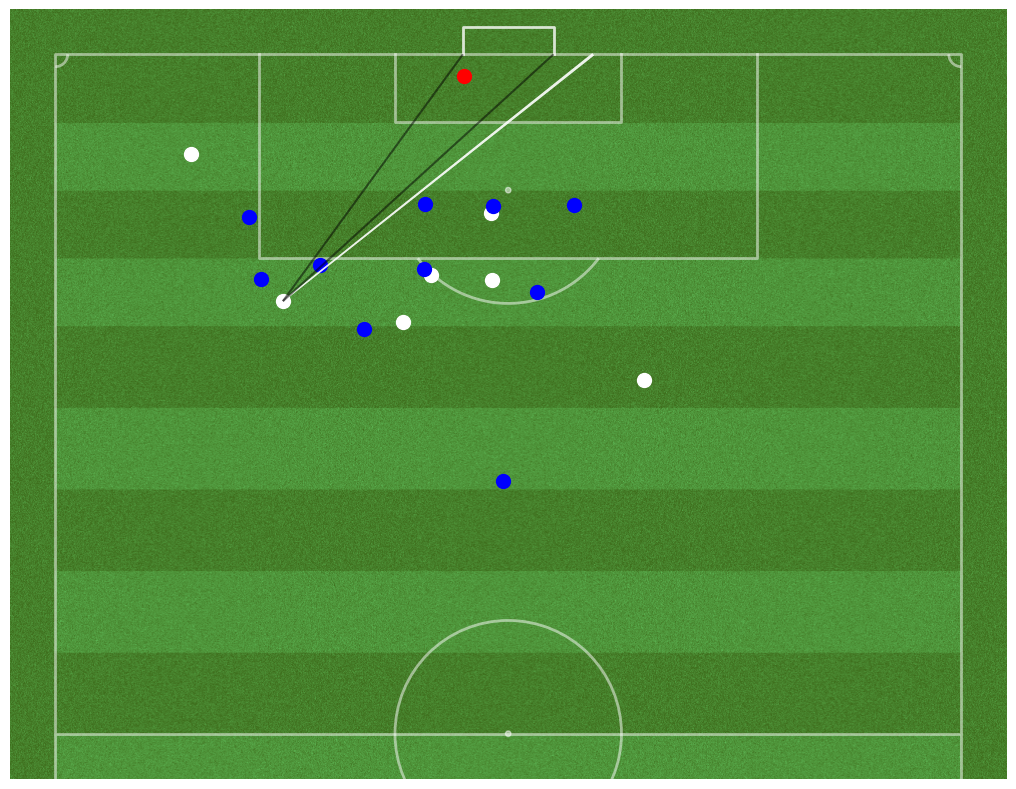

In [223]:
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

p = VerticalPitch(pitch_type='statsbomb',pitch_color='grass', line_color='white',stripe_color='#c2d59d', stripe=True,half=True,
                 line_alpha=0.5, goal_alpha=0.8,corner_arcs=True,goal_type='box')
fig,ax = p.draw(figsize=(12,8))

df_match_360_shot = df_match_360[0:1]


p.scatter(x=df_match_360_shot['x'],y=df_match_360_shot['y'],ax=ax)
p.lines(xstart=df_match_360_shot['x'],ystart=df_match_360_shot['y'],xend=df_match_360_shot['end_x'],yend=df_match_360_shot['end_y'],lw=2,alpha=0.7,comet=True,color='white',ax=ax)

opponent_count = 0
opponent_blocking_shot = 0
keeper_in_goal = False

A = (df_match_360_shot['x'].iloc[0],df_match_360_shot['y'].iloc[0])
B = (120,36)
C = (120,44)

for x in df_match_360_shot.iloc[0]['freeze_frame']:
    if x['teammate'] == True:
        color = 'white'
    elif x['teammate'] == False:
        color = 'blue'
        if x['keeper'] == False and x['location'][0] > df_match_360_shot['x'][0] and x['location'][0] > df_match_360_shot['y'][0]:
            opponent_count += 1
    if x['keeper'] == True:
        color = 'red'
        keeper_in_goal = True

    p.scatter(x=x['location'][0],y=x['location'][1],ax=ax,c = color,s=100)
    #print(x['location'][1])
    point = (x['location'][0],x['location'][1])
    #print(point)
    if point_inside_triangle(point, A, B, C).any():
        opponent_blocking_shot +=1


p.lines(xstart=df_match_360_shot['x'],ystart=df_match_360_shot['y'],xend=120,yend=36,comet=False,color='black',ax=ax,lw=1.5,alpha=0.5)
p.lines(xstart=df_match_360_shot['x'],ystart=df_match_360_shot['y'],xend=120,yend=44,comet=False,color='black',ax=ax,lw=1.5,alpha=0.5)


if keeper_in_goal == True:
    opponent_blocking_shot = opponent_blocking_shot - 1


print("Number of opponents: ",opponent_count)
print("Number of opponents blocking the shot: ",opponent_blocking_shot)
print("Keeper In Goal: ",keeper_in_goal)
print("Shot Taken by: ",df_match_360_shot['player_name'])
print("Shot Taken At: ",df_match_360_shot['timestamp'])

### Dropping malformed data

In [260]:
rows_to_drop = []

for index, row in df_match_360.iterrows():
    try:
        freeze_frame = row['freeze_frame']
        if isinstance(freeze_frame, list):
            for player in freeze_frame:
                print(player.get('teammate', 'N/A'))
        else:
            raise TypeError("Expected 'freeze_frame' to be a list, got: {}".format(type(freeze_frame)))
    except TypeError:
        rows_to_drop.append(index)

# Drop rows with errors
df_match_360.drop(rows_to_drop, inplace=True)

False
True
False
True
True
False
True
False
True
False
False
False
True
False
False
False
True
False
True
False
False
True
True
False
True
True
False
True
False
True
False
False
False
False
False
False
False
True
True
False
False
True
False
False
True
False
True
False
False
False
True
False
False
True
False
True
False
False
True
False
False
False
True
False
True
False
False
False
False
False
True
False
False
False
True
True
False
True
False
False
False
False
False
True
False
False
True
False
False
False
True
False
False
True
True
False
False
False
False
True
False
False
True
False
True
False
False
True
True
False
False
False
True
False
False
False
True
False
True
False
True
False
True
False
False
False
False
True
False
False
True
True
False
False
False
True
False
True
True
True
True
True
False
False
False
True
False
False
False
False
True
False
True
True
True
False
True
False
False
False
True
False
False
True
False
True
True
True
False
False
True
False
False
True
False
False
True
True


### Creating a function to calculate the number of opponents blocking a shot and creating a new column for our dataframe

In [261]:
def opponents_blocking_shot(df):
    df['opponent_blocking_shot'] = 0
    df['keeper_in_goal'] = False
    df['opponent_count'] = 0
    
    A = (df['x'].iloc[0], df['y'].iloc[0])
    B = (120, 36)
    C = (120, 44)
    
    for index, row in df.iterrows():
        freeze_frame = row['freeze_frame']
        for player in freeze_frame:
            if player['teammate'] == False:
                if player['keeper'] == False and player['location'][0] > row['x'] and player['location'][0] > row['y']:
                    df.at[index, 'opponent_count'] += 1
                elif player['keeper'] == True:
                    df.at[index, 'keeper_in_goal'] = True
    
            point = (player['location'][0], player['location'][1])
            if point_inside_triangle(point, A, B, C).any():
                df.at[index, 'opponent_blocking_shot'] += 1
    
        if df.at[index, 'keeper_in_goal'] == True:
            if df.at[index, 'opponent_blocking_shot'] !=0:
                df.at[index, 'opponent_blocking_shot'] -= 1

    return df    

In [262]:
df_match_360 = opponents_blocking_shot(df_match_360)

### Functions to calculate the angle and distance of a shot from the goal and store it as separate columns

In [268]:
import math

def calculate_angle(x, y):
  # 44 and 36 is the location of each goal post
  g0 = [120, 44]
  p = [x, y]
  g1 = [120, 36]

  v0 = np.array(g0) - np.array(p)
  v1 = np.array(g1) - np.array(p)

  angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
  return(abs(np.degrees(angle)))

def calculate_distance(x, y):
  x_dist = 120-x
  y_dist = 0
  if (y<36):
    y_dist = 36-y
  elif (y>44):
    y_dist = y-44
  return math.sqrt(x_dist**2 + y_dist**2)

In [269]:
df_match_360['angle'] = df_match_360.apply(lambda row:calculate_angle(row['x'], row['y']), axis=1)
df_match_360['distance'] = df_match_360.apply(lambda row:calculate_distance(row['x'], row['y']), axis=1)

C:\Users\acer\AppData\Local\Temp\ipykernel_9728\230360434.py:12: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))


In [270]:
df_match_360.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'pass_cross', 'outcome_id',
       'outcome_name', 'under_pressure', 'shot_statsbomb_xg', 'technique_id',
       'technique_name', 'shot_first_time', 'goalkeeper_position_id',
       'goalkeeper_position_name', 'pass_assisted_shot_id', 'pass_shot_assist',
       'end_z', 'shot_key_pass_id', 'off_camera', 'pass_deflected',
       'counterpress', 'aerial_won', 'pass_switch', 'out',
       'foul_won_defensive', 'shot_one_on_one

## Choosing the necessary columns as Features for our model

In [294]:
features = ['x', 'y', 'outcome_name', 'sub_type_name','body_part_name','under_pressure','technique_name'
            ,'shot_one_on_one','opponent_blocking_shot','keeper_in_goal','angle', 'distance','shot_statsbomb_xg']

df_shot = df_match_360[features].copy()

In [295]:
df_shot.shape

(88, 13)

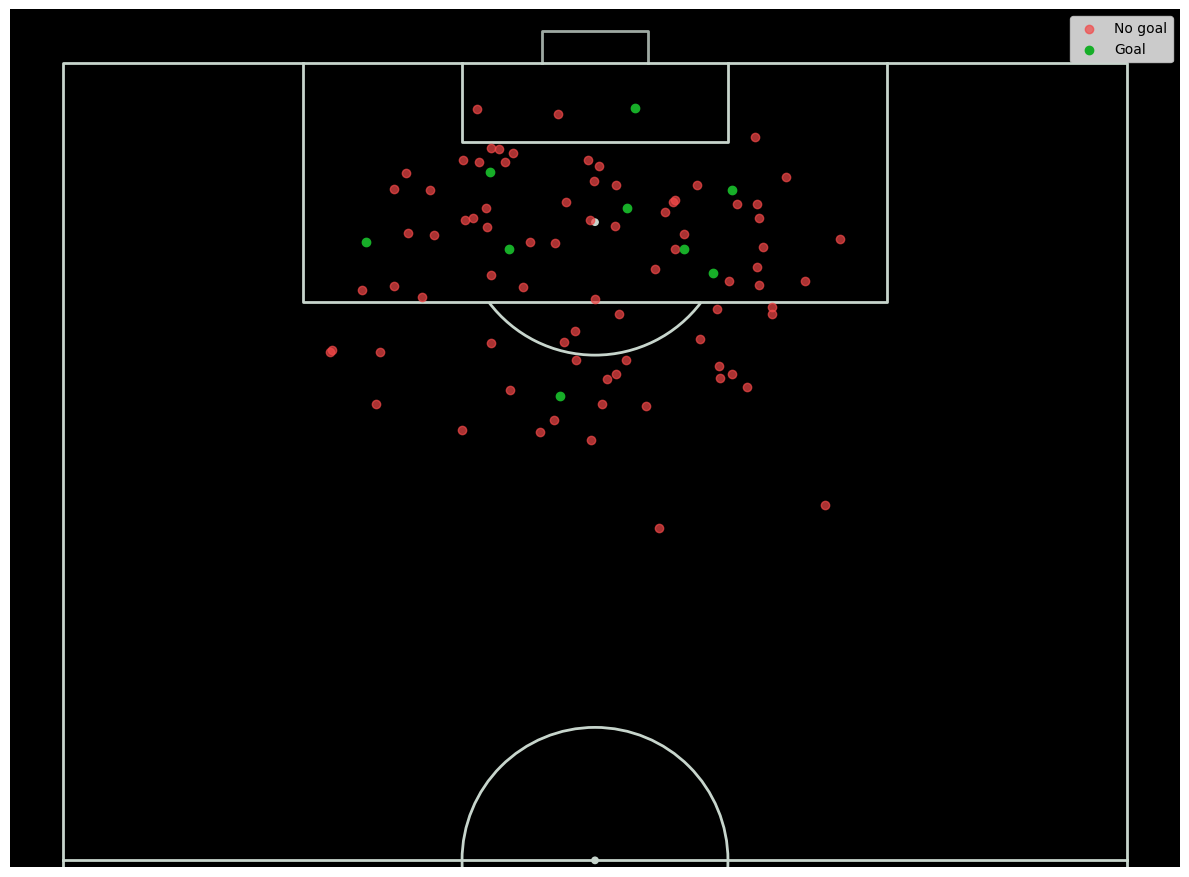

In [296]:
# visualizing shots

# filter goals / non-shot goals
df_goals = df_shot[df_shot.outcome_name == 'Goal'].copy()
df_non_goal_shots = df_shot[df_shot.outcome_name != 'Goal'].copy()

# setup the pitch
pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8, pitch_color='black', line_color='#c7d5cc')  # control the goal transparency

fig, ax = pitch.draw(figsize=(12, 10))

sc1 = pitch.scatter(df_non_goal_shots.x, df_non_goal_shots.y,
                    c='#F24848',
                    marker='o',
                    ax=ax, label="No goal",alpha = 0.7)

sc2 = pitch.scatter(df_goals.x, df_goals.y,
                    c='#17AE28',
                    marker='o',
                    ax=ax, label="Goal")

plt.legend(loc='best')
plt.show()

In [297]:
df_shot.columns

Index(['x', 'y', 'outcome_name', 'sub_type_name', 'body_part_name',
       'under_pressure', 'technique_name', 'shot_one_on_one',
       'opponent_blocking_shot', 'keeper_in_goal', 'angle', 'distance',
       'shot_statsbomb_xg'],
      dtype='object')

### Creating a function to check if the shot was taken from the strong foot of a player or the weak foot

In [315]:
def is_preferable_side(y, body_part_name):
  preferable_side = 0
  side = 'center'
  if (y<40):
    side = 'left'
  elif (y>40):
    side = 'right'

  if ((side=='left') & (body_part_name=='Right Foot')) | ((side=='right') & (body_part_name=='Left Foot')):
    preferable_side = 1
  return preferable_side

### Applying encoding techniques for categorical columns

In [299]:
df_shot['goal'] = df_shot.apply(lambda row:1 if row['outcome_name']=='Goal' else 0, axis=1)

df_shot['preferable_side'] = df_shot.apply(lambda row:is_preferable_side(row['y'], row['body_part_name']), axis=1)
df_shot['header'] = df_shot.apply(lambda row:1 if row['body_part_name']=='Head' else 0, axis=1)

df_shot['under_pressure'] = df_shot['under_pressure'].fillna(0)
df_shot['under_pressure'] = df_shot['under_pressure'].astype(int)

df_shot['shot_one_on_one'] = df_shot['shot_one_on_one'].fillna(0)
df_shot['shot_one_on_one'] = df_shot['shot_one_on_one'].astype(int)

# one hot encoding for techniques and sub types
df_shot = pd.get_dummies(df_shot, columns = ['technique_name'])
df_shot = pd.get_dummies(df_shot, columns = ['sub_type_name'])

In [286]:
df_shot.head()

,x,y,outcome_name,body_part_name,under_pressure,shot_one_on_one,shot_open_goal,opponent_blocking_shot,keeper_in_goal,angle,distance,shot_statsbomb_xg,goal,preferable_side,header,technique_name_Half Volley,technique_name_Lob,technique_name_Normal,technique_name_Volley,sub_type_name_Open Play
0,98.2,20.1,Off T,Right Foot,0,0,0,1,True,11.525564,26.982402,0.011147,0,1,0,False,False,True,False,True
1,104.2,48.9,Goal,Left Foot,0,0,0,0,True,22.000062,16.542370,0.066638,1,1,0,False,False,True,False,True
2,99.8,38.5,Saved,Left Foot,0,0,0,0,True,22.286302,20.200000,0.045172,0,0,0,False,False,True,False,True
3,110.4,50.3,Goal,Right Foot,0,0,0,0,True,22.850518,11.482596,0.280607,1,0,0,False,False,True,False,True
4,95.4,33.6,Off T,Left Foot,0,0,0,0,True,17.344705,24.716796,0.032842,0,0,0,False,False,True,False,True


In [300]:
df_shot.groupby('goal').mean(['x', 'y', 'outcome_name', 'sub_type_name', 'body_part_name',
       'under_pressure', 'technique_name', 'shot_one_on_one',
       'opponent_blocking_shot', 'keeper_in_goal', 'angle', 'distance',
       'shot_statsbomb_xg'])

,x,y,under_pressure,shot_one_on_one,opponent_blocking_shot,keeper_in_goal,angle,distance,shot_statsbomb_xg,preferable_side,header,technique_name_Half Volley,technique_name_Lob,technique_name_Normal,technique_name_Volley,sub_type_name_Open Play
goal,,,,,,,,,,,,,,,,
0,104.058228,39.555696,0.164557,0.088608,1.050633,0.987342,23.568002,17.289994,0.089514,0.379747,0.126582,0.126582,0.012658,0.835443,0.025316,1.0
1,107.277778,39.677778,0.000000,0.111111,0.444444,1.000000,30.933036,13.762839,0.205617,0.333333,0.000000,0.111111,0.000000,0.888889,0.000000,1.0


In [288]:
df_shot['distance'].corr(df_shot['goal'])

-0.15292885939111625

In [289]:
df_shot['angle'].corr(df_shot['goal'])

0.17770251296619205

In [301]:
df_shot['opponent_blocking_shot'].corr(df_shot['goal'])

-0.1366526605253597

In [303]:
import altair as alt
fig = alt.Chart(df_shot).mark_point().encode(
  x='opponent_blocking_shot',y='goal')

fig + fig.transform_regression('opponent_blocking_shot','goal').mark_line()

alt.LayerChart(...)

## Creating a Logistic Regression model

In [305]:
df_shot.columns

Index(['x', 'y', 'outcome_name', 'body_part_name', 'under_pressure',
       'shot_one_on_one', 'opponent_blocking_shot', 'keeper_in_goal', 'angle',
       'distance', 'shot_statsbomb_xg', 'goal', 'preferable_side', 'header',
       'technique_name_Half Volley', 'technique_name_Lob',
       'technique_name_Normal', 'technique_name_Volley',
       'sub_type_name_Open Play'],
      dtype='object')

In [306]:
X_cols = ['under_pressure', 'angle', 'distance',
       'preferable_side', 'header', 'technique_name_Half Volley',
       'technique_name_Lob', 'technique_name_Normal','technique_name_Volley',
       'sub_type_name_Open Play']
X = df_shot[X_cols]
X.head()

,under_pressure,angle,distance,preferable_side,header,technique_name_Half Volley,technique_name_Lob,technique_name_Normal,technique_name_Volley,sub_type_name_Open Play
0,0,11.525564,26.982402,1,0,False,False,True,False,True
1,0,22.000062,16.542370,1,0,False,False,True,False,True
2,0,22.286302,20.200000,0,0,False,False,True,False,True
3,0,22.850518,11.482596,0,0,False,False,True,False,True
4,0,17.344705,24.716796,0,0,False,False,True,False,True


In [307]:
X.shape

(88, 10)

In [308]:
y = df_shot['goal']

In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict_proba(X)[:, 1]
metrics.r2_score(y, y_pred)

0.07833152042332181

In [312]:
metrics.r2_score(y, df_shot['shot_statsbomb_xg'])

0.0934645234759024

## Our model has an R2 score of 0.078 and the statsbomb model for the same data has an r2 score of 0.093 , thus their model is still much better as they take into account much more metrics to calculate xG such as shot velocity and keeper position with the help of tracking data

In [313]:
df_shot['xG'] = y_pred

In [314]:
df_shot.head()

,x,y,outcome_name,body_part_name,under_pressure,shot_one_on_one,opponent_blocking_shot,keeper_in_goal,angle,distance,shot_statsbomb_xg,goal,preferable_side,header,technique_name_Half Volley,technique_name_Lob,technique_name_Normal,technique_name_Volley,sub_type_name_Open Play,xG
0,98.2,20.1,Off T,Right Foot,0,0,1,True,11.525564,26.982402,0.011147,0,1,0,False,False,True,False,True,0.047981
1,104.2,48.9,Goal,Left Foot,0,0,0,True,22.000062,16.542370,0.066638,1,1,0,False,False,True,False,True,0.118531
2,99.8,38.5,Saved,Left Foot,0,0,0,True,22.286302,20.200000,0.045172,0,0,0,False,False,True,False,True,0.079402
3,110.4,50.3,Goal,Right Foot,0,0,0,True,22.850518,11.482596,0.280607,1,0,0,False,False,True,False,True,0.146674
4,95.4,33.6,Off T,Left Foot,0,0,0,True,17.344705,24.716796,0.032842,0,0,0,False,False,True,False,True,0.053071
